In [1]:
import os
import keras
import pprint
import numpy as np
import pickle
# import dill as pickle
import matplotlib.pyplot as plt
from keras import applications
from keras import optimizers
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.imagenet_utils import decode_predictions
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils.np_utils import to_categorical
from PIL import Image
%matplotlib inline

traindir = '/home/saniea/imagedata/cifar10/'
valdir = '/home/saniea/imagedata/cifar10/'
testdir = '/home/saniea/imagedata/cifar10/'

Using TensorFlow backend.


In [2]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [3]:
for root, dirs, filenames in os.walk(traindir):
    files = filenames
# print(files)

data = []
[data.append(file) for file in files if (file.startswith('data') == True)]
data.sort()
# print(data)

X = np.empty((50000,3072))
for i, batch in enumerate (data):
    current_batch = unpickle(str(traindir+batch))
    batch_data = current_batch[b'data']
    j = data.index(batch) + 1 
    batch_len = batch_data.shape[0]
    X[batch_len*i:batch_len*j] = batch_data
    
    # i = 0, index = 1 --> 00000 - 10000
    # i = 1, index = 2 --> 10000 - 20000
    # i = 2, index = 3 --> 20000 - 30000
print(X.shape) # all data extracted from files and stored in array X

(50000, 3072)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(32, 32, 3)


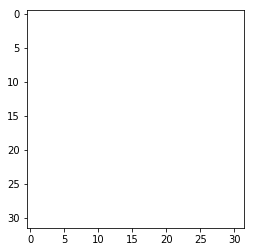

In [9]:
# print(batch_one.keys())
# X = batch_one[b'data']
# Y = batch_one[b'labels']
# print(X)
X = X.reshape(50000, 3, 32, 32)
X = X.transpose(0, 2, 3, 1)
print(X[6].shape)
# print(X[5])
plt.imshow(X[6], interpolation='none')
# print(Y[25])
